### Importing liabraries for file handling, data manipulation, data visualization

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

### Importing data file 

In [2]:
df = pd.read_csv(r'C:\Users\navneet\Desktop\mallcustomers.csv')

In [3]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.tail(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


### Understanding the structure of the data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#for getting the average of our dataset columns 
df.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [8]:
df.std()
#how much the values are differs from the mean value of dataset.

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

### we got to know that standard deviation of all the columns or below avg except customer_Id

In [9]:
df.ndim

2

In [10]:
df.shape

(200, 5)

In [11]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Describing columns 
Customer Id : Showing the customer Id of the customers.

Genre : Showing the male and female customers.

Age: Age of the customers.

Annual Income : How much person is earning annually.

Spending Score : Spending capacity of the person.

### Checking the null values.

In [12]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Importing label encoder from sklearn preprocessing liabrary for assigning gender column a binary value that is 1 and 0.

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

### Renaming column name genre to gender.

In [14]:
df.rename(columns={'Genre': 'Gender'}, inplace= True)

In [15]:
df.Gender=le.fit_transform(df.Gender)

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### 1 male 
### 0 female

### Analysing data through data visualization.

<Figure size 360x360 with 0 Axes>

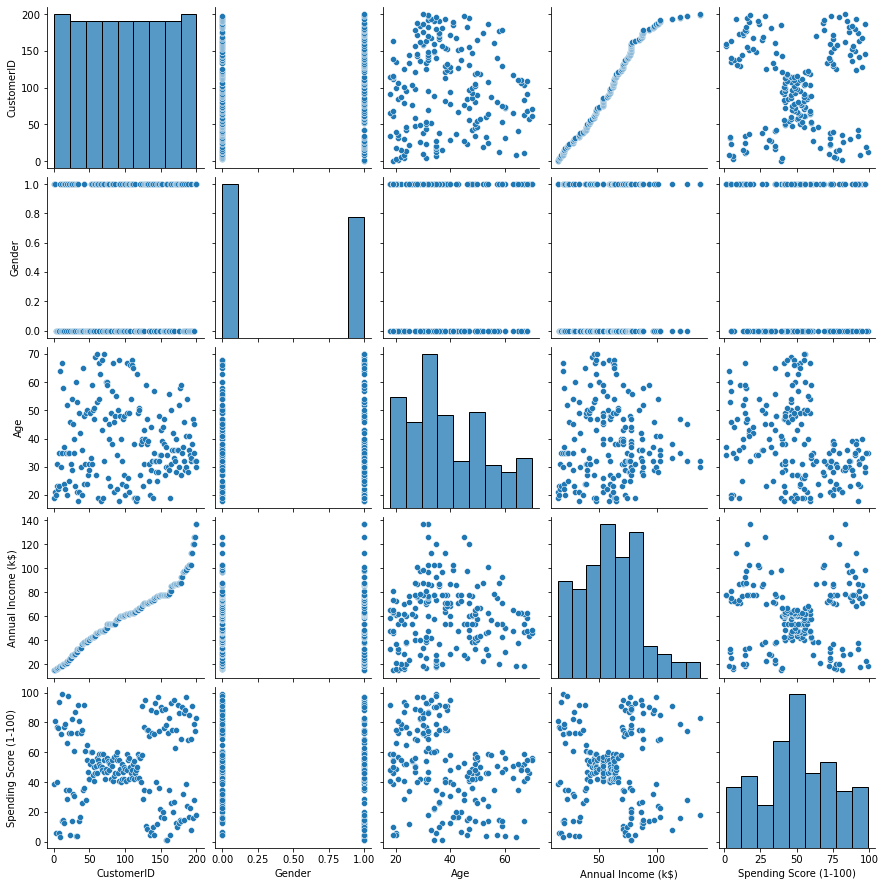

In [17]:
plt.figure(figsize=(5,5))
sns.pairplot(df)

In [18]:
df.corr()
# data correlation inform us about the 2 metrics that are strongly linked to each other and follow up on each other in a linear 
#line. A correlation can be positive or negative.When a correlation is positive there is an increase of value and vice versa.
#A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


<AxesSubplot:>

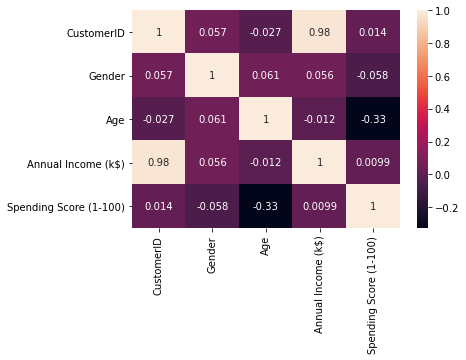

In [19]:
sns.heatmap(df.corr(),annot=True)

### Importing Kmeans algorithm from sklearn. cluster liab for further analysis. 

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmodel=KMeans(4)

In [22]:
kmodel.fit(df)

KMeans(n_clusters=4)

In [23]:
kmodel.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [24]:
df['cluster']=kmodel.labels_

In [25]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


In [26]:
df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [27]:
df['cluster'].value_counts()

0    66
2    59
1    39
3    36
Name: cluster, dtype: int64

### Seperating cluster on the basis of their cluster values.

In [28]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]

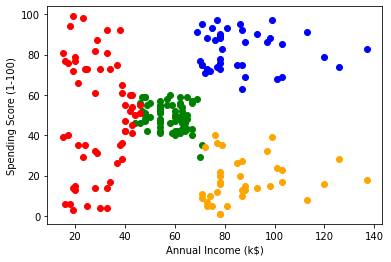

In [29]:
plt.scatter(df0['Annual Income (k$)'], df0['Spending Score (1-100)'],color='green')
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'],color='blue')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'],color='orange')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [30]:
df2['Spending Score (1-100)'].max()

99

In [31]:
df3['Spending Score (1-100)'].max()

40

### Cluster 2 & 3 have the high purchase power and cluster 3 is cover  maximum spending score.

In [32]:
df3.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
128,129,1,59,71,11,3
130,131,1,47,71,9,3
132,133,0,25,72,34,3
134,135,1,20,73,5,3
136,137,0,44,73,7,3
138,139,1,19,74,10,3
140,141,0,57,75,5,3
142,143,0,28,76,40,3
144,145,1,25,77,12,3
146,147,1,48,77,36,3


In [33]:
df3.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,164.000000,0.527778,40.805556,87.916667,17.888889,3.0
std,21.071308,0.506309,11.305674,16.231143,10.708549,0.0
min,129.000000,0.000000,19.000000,71.000000,1.000000,3.0
25%,146.500000,0.000000,34.000000,77.000000,10.000000,3.0
50%,164.000000,1.000000,41.500000,83.000000,16.000000,3.0
75%,181.500000,1.000000,47.250000,97.250000,24.500000,3.0
max,199.000000,1.000000,59.000000,137.000000,40.000000,3.0


In [34]:
freq,bins=np.histogram(df3['Age'],bins=20)

In [35]:
freq

array([3, 0, 0, 2, 1, 0, 1, 4, 2, 2, 1, 3, 3, 2, 4, 1, 1, 1, 1, 4],
      dtype=int64)

In [36]:
bins

array([19., 21., 23., 25., 27., 29., 31., 33., 35., 37., 39., 41., 43.,
       45., 47., 49., 51., 53., 55., 57., 59.])

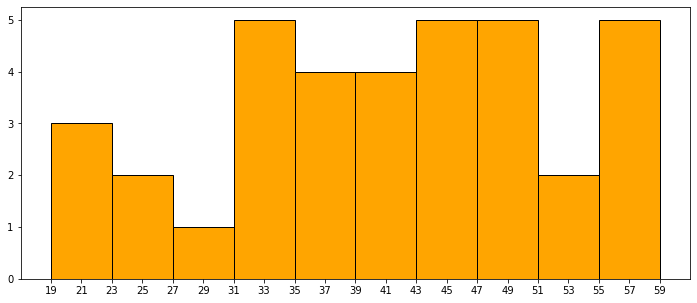

In [37]:
plt.figure(figsize=(12,5))
plt.hist(df3['Age'],bins=10,color= 'orange',ec='k')
plt.xticks(bins)
plt.show()

### Cluster 3 is based on high spending score and the target age is 18 to 67

In [38]:
freq,bins=np.histogram(df3['Annual Income (k$)'],bins=20)

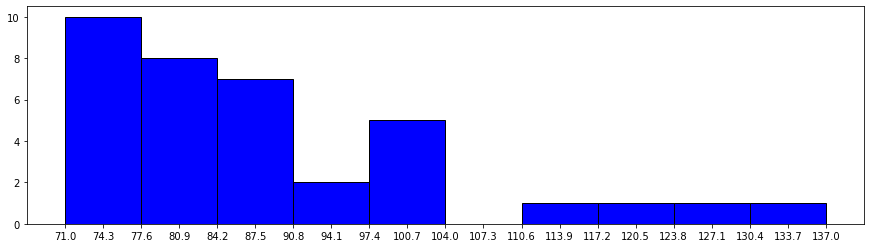

In [39]:
plt.figure(figsize=(15,4))
plt.hist(df3['Annual Income (k$)'],bins=10,color= 'blue',ec='k')
plt.xticks(bins)
plt.show()

### Income of the cluster 3 stands between 15 to 46 

In [40]:
freq,bins=np.histogram(df3['Spending Score (1-100)'],bins=20)

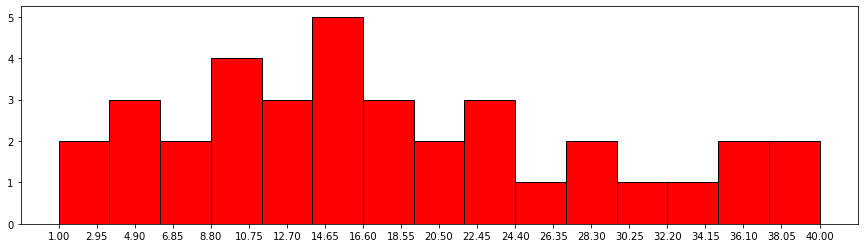

In [41]:
plt.figure(figsize=(15,4))
plt.hist(df3['Spending Score (1-100)'],bins=15,color= 'red',ec='k')
plt.xticks(bins)
plt.show()

### Cluster 1 spending score is between 3 to 99

In [42]:
df3['Gender'].value_counts()

1    19
0    17
Name: Gender, dtype: int64

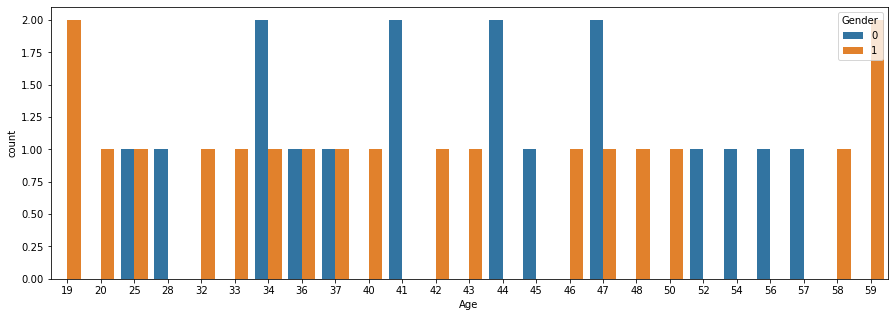

In [43]:
plt.figure(figsize=(15,5))
sns.countplot('Age', data=df3,hue='Gender')
plt.show()

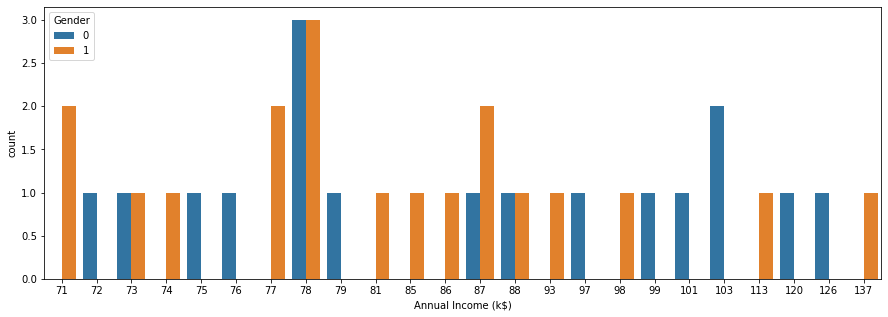

In [44]:
plt.figure(figsize=(15,5))
sns.countplot('Annual Income (k$)', data=df3,hue='Gender')
plt.show()

<BarContainer object of 59 artists>

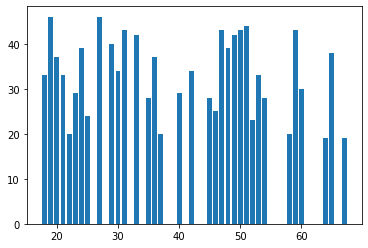

In [45]:
plt.bar(df2['Age'],df2['Annual Income (k$)'])

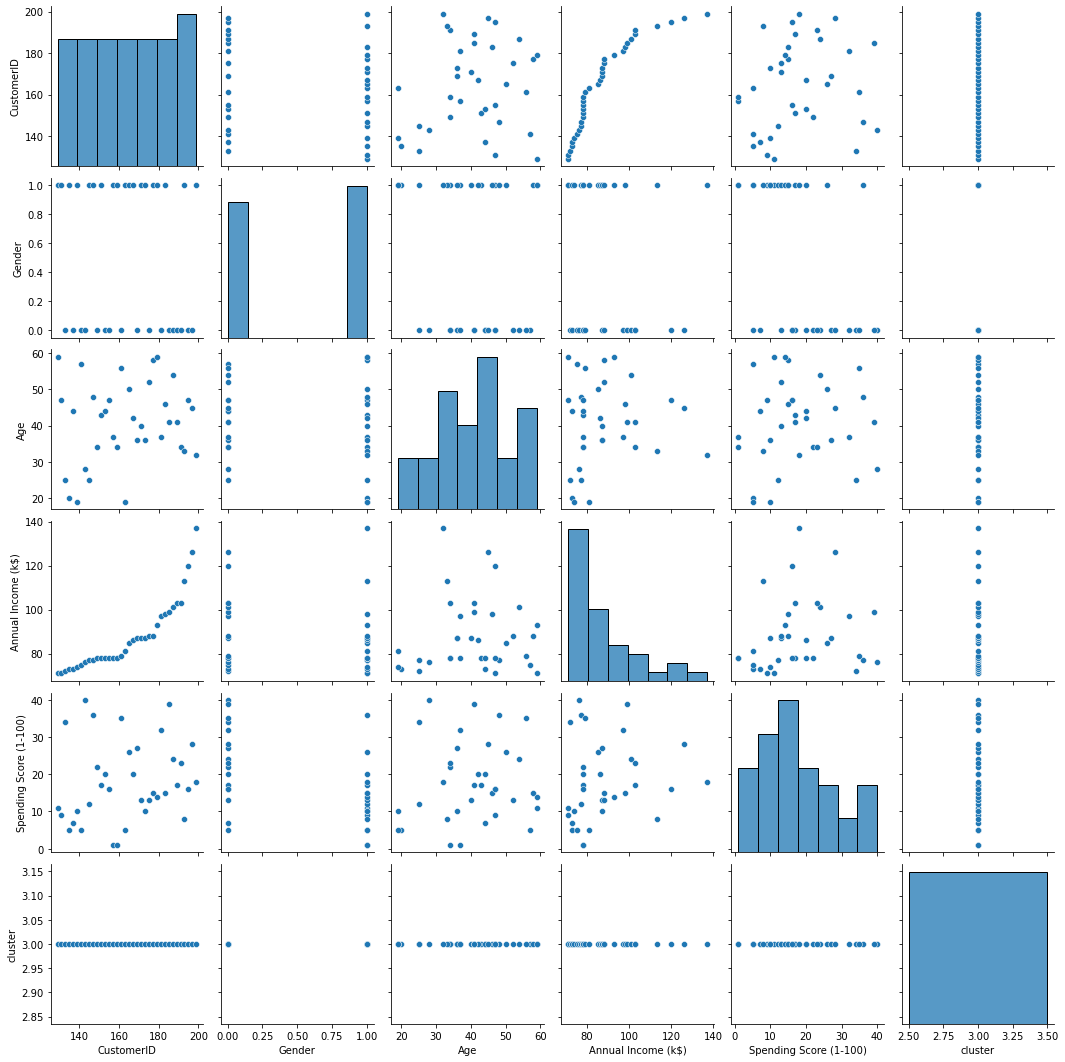

In [46]:
sns.pairplot(df3)

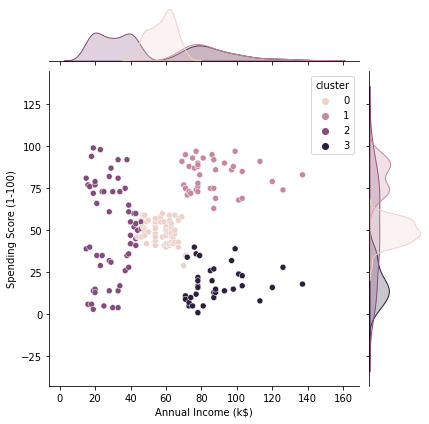

In [47]:
sns.jointplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster')

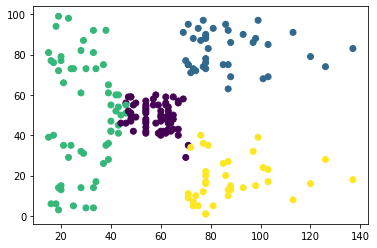

In [48]:
plt.scatter(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',c=df['cluster'])

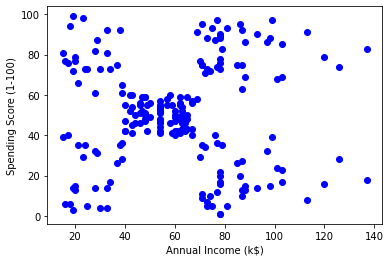

In [49]:
# Here it is the relation in annual income and spending score 
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color= 'b')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Summary and conclusion
After all the above analysis by using unsupervised algorithm that is k means cluster we found that cluster 3 have the high purchasing power and further, cluster 3  stands between the age bar of 18 to 67, income stands between 15 to 46, spending score stands between 3 to 99. 

Through above analysis we got to know that female buyers are higher as compare to the males which signifies that purchasing power of the female is higher than the male so this indicates that our target audience is female for maximizing our sales in future.

Steps followed in this analysis can be used to know about the factors that which gender is highly active in buying and spending money, it also helps us to know about the annual income of the customers through which we can predict the spending capacity of them and after that we can enhance our sales by targeting that particular audience or gender. 

